In [1]:
import matplotlib.pyplot as plt

import cv2

%matplotlib inline

In [2]:
cat4=cv2.imread('CATS_DOGS/train/CAT/4.jpg')


In [3]:
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

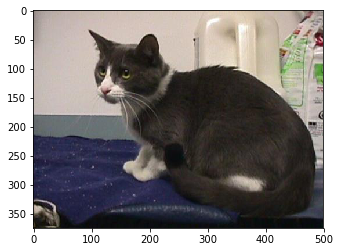

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog=cv2.imread('CATS_DOGS/train/DOG/2.jpg')


In [7]:
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

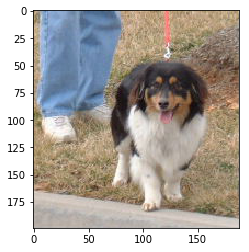

In [8]:
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
image_gen=ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

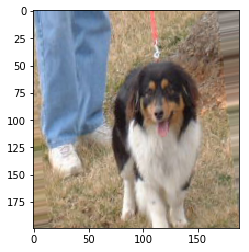

In [12]:
plt.imshow(image_gen.random_transform(dog))

In [13]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
input_shape=(150,150,3)  

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense


In [17]:
model =Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [19]:
batch_size=16

train_image_gen=image_gen.flow_from_directory('CATS_DOGS/train',
                                              target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 18743 images belonging to 2 classes.


In [20]:
batch_size=16

test_image_gen=image_gen.flow_from_directory('CATS_DOGS/test',
                                              target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 6251 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [24]:
results=model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                           validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
 48/150 [========>.....................] - ETA: 1:40 - loss: 0.6967 - acc: 0.5169

C:\Users\075be\.conda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\075be\.conda\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


150/150 [==============================] - 428s 3s/step - loss: 0.6902 - acc: 0.5329 - val_loss: 0.6891 - val_acc: 0.5439


In [25]:
results.history['acc']

[0.5329166666666667]

In [27]:
from keras.models import load_model #to load a model

In [28]:
new_model=load_model('cat_dog_100epochs.h5')

OSError: Unable to open file (unable to open file: name = 'cat_dog_100epochs.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [29]:
dog_file='CATS_DOGS/test/DOG/10003.jpg'

In [31]:
from keras.preprocessing import image

In [32]:
dog_img=image.load_img(dog_file,target_size=(150,150))

In [33]:
dog_img=image.img_to_array(dog_img)

In [34]:
dog_img.shape

(150, 150, 3)

In [35]:
import numpy as np
dog_img=np.expand_dims(dog_img,axis=0)# expanding one dimension and making dog_img of batch 1

In [36]:
dog_img.shape

(1, 150, 150, 3)

In [37]:
dog_img=dog_img/255

In [40]:
model.predict_classes(dog_img)  # predictiong the class of object

array([[1]])

In [42]:
model.predict(dog_img)

array([[0.5095693]], dtype=float32)